<a href="https://colab.research.google.com/github/Tamzid12/Data_Analytics_2/blob/main/python/Unit_4_ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In code 1 we are importing the pandas library, that will allow us to read the file from the link provided in code 2. 

In [4]:
import pandas as pd

In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In code 3, we are using the .head() method to get a sense of what the dataset looks like. .head() method provides us with the first 5 columns from the datasets.

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# EDA (Exploratory Data Analysis)

Here we are importing the seaborn and mathplot libabry, which are essential for coming up with heathmaps and other visualization methods such as a bar graph or scatter plot. 

In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Here we are drawing a heatmap to show which columns are empty. Heatmap is a great to visualize nullvalues. Because it shades the nullvalues with different colors than the rest of the graph, which makes it really easy to see which columns have empty spots. Therefore, we can use different methods to either fill them up or get rid of them, if they are not necessary to what we are trying to achieve. 

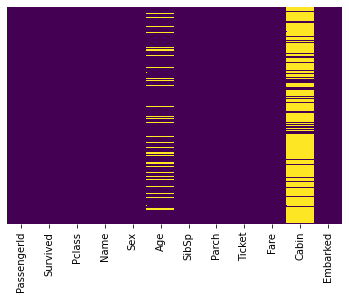

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Class


With these lines of codes we are drawing a simple bar graph to see the difference between the number of people that has survived, and the number of people that have died. '0' represent the number of people that have died and '1' represent the nmuber of people that have survived. 

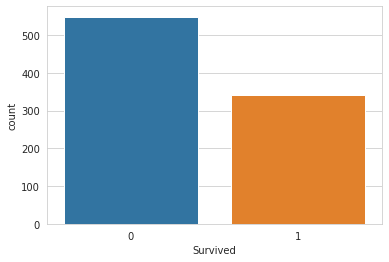

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

## Survived

Since our main goal is to come up with a model that will most accurately predict which type of people were most likely to survive, we will break down the "Survived" graph above into smaller parts. In the graph below, we're trying to figure out what the survival proportion is between male female. Because we're trying examine if one gender had a better chance of survival than the other. As we can see from the graph, females have a higher survival rate than male.

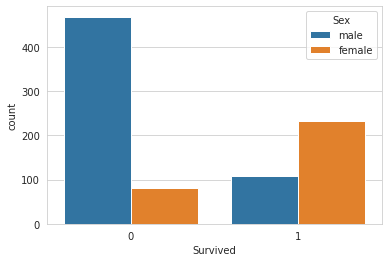

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train)

In the graph below, we are again examining the "Survival" graph by visualizing the relationship between survival rate and socio-economic class.
As we can see, the lower spectrum of socio-economic class had a much higher death rate than the people on the other side of the spectrum. 

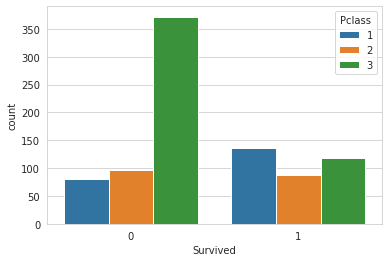

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

## Age

In the graph below, we are examining the relationhip between age and survival rate. As we can see from the graph, young adults between the age of 20-35 have a higher survival rate than other age groups. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


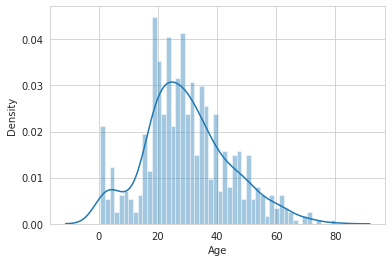

In [ ]:
sns.distplot(train['Age'].dropna(), kde=True, bins=50)

## Siblings

The below graph examines the relationship the between number of companions, such as siblins and spouse, and survival rate. As seen in the grap, people with 1 or no companions have a much higher survival rate than the people that have more than 1 companions. 

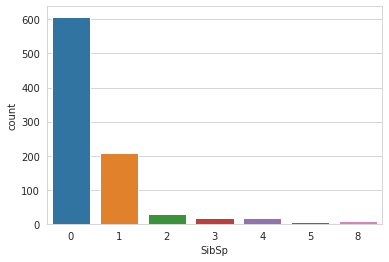

In [ ]:
sns.countplot(x='SibSp',data=train)

# Data Cleaning and Data Pre - Processing

First, we are dropping the 'Cabin' column, because it contains objects, not numerics, and we can't have any other type of variables other than numeric variables.
Then, we are dummying the 'Sex', and 'Embarked' column, since they have an impact on the survival rate, as mentioned above. And we're dropping the other columns,'Name', and 'Ticket', because those two columns don't have any impact of the survival rate. We're also gonna drop the old 'Sex' and 'Embarked' column and use the dummy version.

In [6]:
train.drop('Cabin', axis=1, inplace= True)

In [ ]:
train.dropna(inplace=True)

In [ ]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace= True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embark],axis=1)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model building

In these codes, we are doing the train and test part of the model. We use the "Train Test Split" method because, when we are dealing with a large dataset, it is time consuming to test the entire data set. Instead we choose to focus on only a part of the entire dataset, called the "Test", and we imply the results of the test to train the rest of the dataset. 

In this particular model, we are chosing to test 30% of the dataset, and imply the found results on the other 70%.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'],test_size=0.3, random_state=101) 

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predict = logmodel.predict(X_test)

## Classification report

In [27]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predict))

## Confusion Matrix

Here we came up with a confusion matrix, where we denoted the actual and predicted number of deads. And we visualized it using a heatmap. From there the algorithm came up with our accuracy rate, which is about 77%.

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict))

[[105  23]
 [ 26  60]]


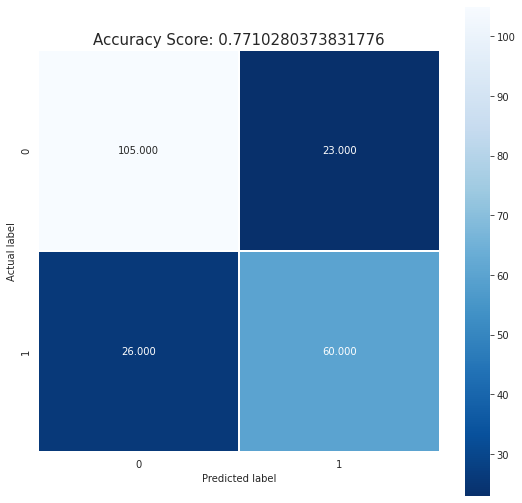

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
from sklearn import  metrics

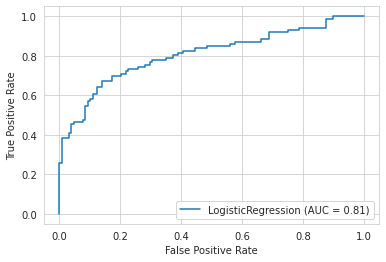

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

#Conclusions:

#1) 
Overall, from all the people that were on board, more people have died than survived. For about every 340 people that have survived, about 560 people have died. 
#2)
 While it is true that there were far more male on board of the Titanic than female, still a lot more male have died than female. Males have a survival rate of about 19%, whereas, females have a survival rate of almost 75%. 
#3)
 People who are of lower socio-economic class, regardless of gender, have a higher death rate than the people with higher socio-economic class. 
#4)
 Someone who is single, wealthy, and between the age of 20-35 have the highest chance of survival. Because as shown the graphs above, people between the age of 20-35 have a higher survival rate. People of higher socio-economic class also have a higher survival rate. And finally, someone who is single, and have no companion have a higher survival rate. If someone is combination of all of that charactersitics they'll have the highest chance of survival. 
#5) 
 on average, according to our model, about 77 people out of 100 will survive. 






